## Data Import

In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

data_random= pd.read_csv('final_dataset_random_sampled.csv')
data_random.drop(data_random.columns[[0,1]], axis=1, inplace=True)
data_random.columns = data_random.columns.str.upper()
data_random=data_random.sort_index(axis=1)
data_random

data_coinbase= pd.read_csv('final_dataset_coinbase.csv')
data_coinbase.drop(data_coinbase.columns[[0,1]], axis=1, inplace=True)
data_coinbase.columns = data_coinbase.columns.str.upper()
data_coinbase=data_coinbase.sort_index(axis=1)
data_coinbase

,AVG_MIN_BETWEEN_RECEIVED_TNX,AVG_MIN_BETWEEN_SENT_TNX,AVG_VALUE_RECEIVED,AVG_VALUE_SENT,ERC20_AVG_TIME_BETWEEN_REC_TNX,ERC20_AVG_TIME_BETWEEN_SENT_TNX,ERC20_UNIQ_REC_ADDR,ERC20_UNIQ_SENT_ADDR,FLAG,MAX_VALUE_RECEIVED,...,RECIEVED_TNX,SENT_TNX,TIME_DIFF_BETWEEN_FIRST_AND_LAST_(MINS),TOTAL_ERC20_TNXS,TOTAL_ETHER_BALANCE,TOTAL_ETHER_RECEIVED,TOTAL_ETHER_SENT,TOTAL_TRANSACTIONS(INCLUDING_TNX_TO_CREATE_CONTRACT),UNIQUE_RECEIVED_FROM_ADDRESSES,UNIQUE_SENT_TO_ADDRESSES
0,7179.838889,2.246021,30.009950,0.000000,1.800229e+03,0.000000,207,1,0,100.000000,...,4,9996,22517.050000,315,37.708314,120.039800,0.000000,10000,4,1
1,0.000000,0.000000,0.012094,0.000000,0.000000e+00,0.000000,0,0,0,0.012094,...,1,0,0.000000,0,0.000000,0.012094,0.000000,1,1,0
2,0.000000,0.000000,0.028257,0.027851,0.000000e+00,0.000000,0,0,0,0.028257,...,1,1,0.200000,0,0.000000,0.028257,0.027851,2,1,1
3,0.000000,0.000000,0.001499,0.000000,1.200000e+00,0.000000,2,1,0,0.001499,...,1,1,2.000000,3,0.000843,0.001499,0.000000,2,1,1
4,0.000000,0.000000,0.057089,0.056683,0.000000e+00,0.000000,0,0,0,0.057089,...,1,1,0.200000,0,0.000000,0.057089,0.056683,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,318.741667,0.000000,0.412773,1.237457,1.924054e+06,0.000000,2,0,1,0.520000,...,3,1,19371.600000,2,0.000000,1.238318,1.237457,4,3,1
22540,0.000000,0.000000,0.002904,0.000000,2.400000e+01,0.000000,2,1,1,0.002904,...,1,1,0.200000,3,0.000218,0.002904,0.000000,2,1,1
22541,0.000000,0.000000,0.003687,0.000000,4.410000e+01,0.000000,2,1,1,0.003687,...,1,1,0.800000,4,0.000398,0.003687,0.000000,2,1,1
22542,0.000000,4.144444,0.501611,0.380111,3.458446e+05,4.161111,4,2,1,0.501611,...,1,13,93.333333,11,0.000000,0.501611,4.941441,14,1,7


In [82]:
X = data_random.drop('FLAG', axis=1)
Y = data_random['FLAG']
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=1, test_size=0.30)

In [83]:
Xc = data_coinbase.drop('FLAG', axis=1)
Yc = data_coinbase['FLAG']
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc,Yc, random_state=1, test_size=0.30)

## Random Forest

##### Random Sampling

In [84]:
import time
start_time = time.time()
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [85]:
rfc_pred = rfc.predict(X_test)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Computation time: {elapsed_time:.2f} seconds")

rfc_pred

Computation time: 5.96 seconds


array([0, 0, 1, ..., 1, 1, 0])

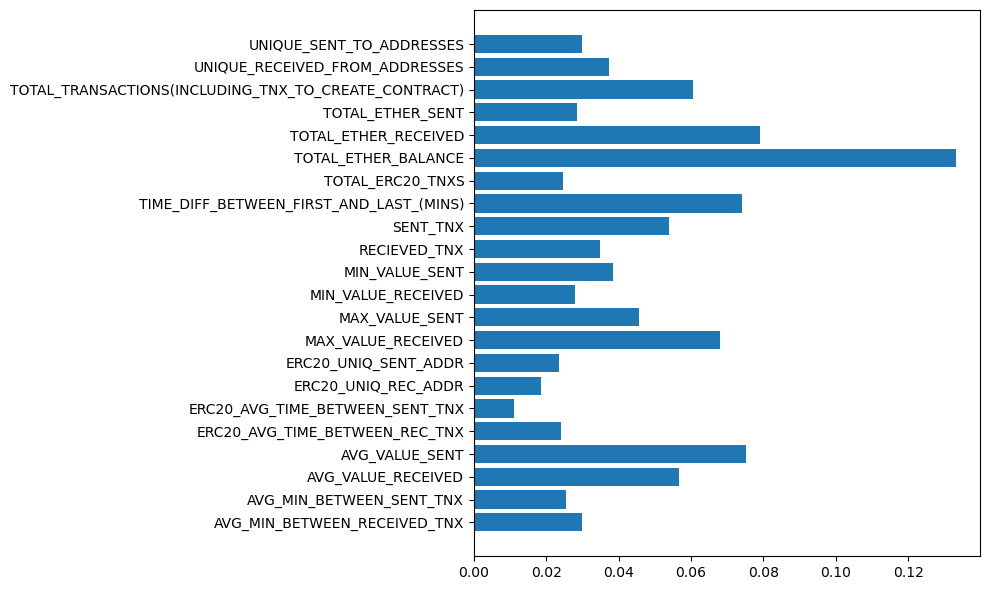

In [86]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6)) 
rfc.feature_importances_
plt.barh(X.columns, rfc.feature_importances_)
plt.tight_layout()

In [ ]:
#Shaply Values
from shap import TreeExplainer
from shap import summary_plot

explainer = TreeExplainer(rfc)
shap_values = np.array(explainer.shap_values(X_train))


shap_values_ = shap_values.transpose((1,0,2))

np.allclose(
    rfc.predict_proba(X_train),
    shap_values_.sum(2) + explainer.expected_value
)

plt.figure(figsize=(3, 3))
#summary_plot(shap_values[0],X_train,plot_type="bar")

summary_plot(shap_values[0],X_train)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [87]:
from sklearn.metrics import precision_recall_fscore_support,classification_report,confusion_matrix
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      4399
           1       0.96      0.91      0.93      3437

    accuracy                           0.94      7836
   macro avg       0.94      0.94      0.94      7836
weighted avg       0.94      0.94      0.94      7836



In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

predicted_labels = rfc.predict(X_test)
true_labels = y_test
accuracy_rfc = accuracy_score(true_labels, predicted_labels)
precision_rfc = precision_score(true_labels, predicted_labels)
recall_rfc = recall_score(true_labels, predicted_labels)

In [89]:
import pandas as pd

results_list=[]
model_name = "Random Forest"
results_dict = {
    'Model': model_name,
    'Accuracy': accuracy_rfc,
    'Precision': precision_rfc,
    'Recall': recall_rfc
}

new_entry_df = pd.DataFrame([results_dict])

existing_rows = results_random_df[results_random_df['Model'] == model_name]

if not existing_rows.empty:
    results_random_df = results_random_df[results_random_df['Model'] != model_name]

results_random_df = pd.concat([results_random_df, new_entry_df], ignore_index=True)
results_random_df


,Model,Accuracy,Precision,Recall
0,Decision Trees,0.911578,0.908294,0.915289
1,Random Forest,0.941679,0.958462,0.906314


##### Coinbase

In [90]:
import time
start_time = time.time()
from sklearn.ensemble import RandomForestClassifier
rfcc = RandomForestClassifier(n_estimators=100)
rfcc.fit(Xc_train, yc_train)

RandomForestClassifier()

In [91]:
rfcc_pred = rfcc.predict(Xc_test)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Computation time: {elapsed_time:.2f} seconds")

rfcc_pred

Computation time: 4.07 seconds


array([1, 0, 1, ..., 1, 0, 0])

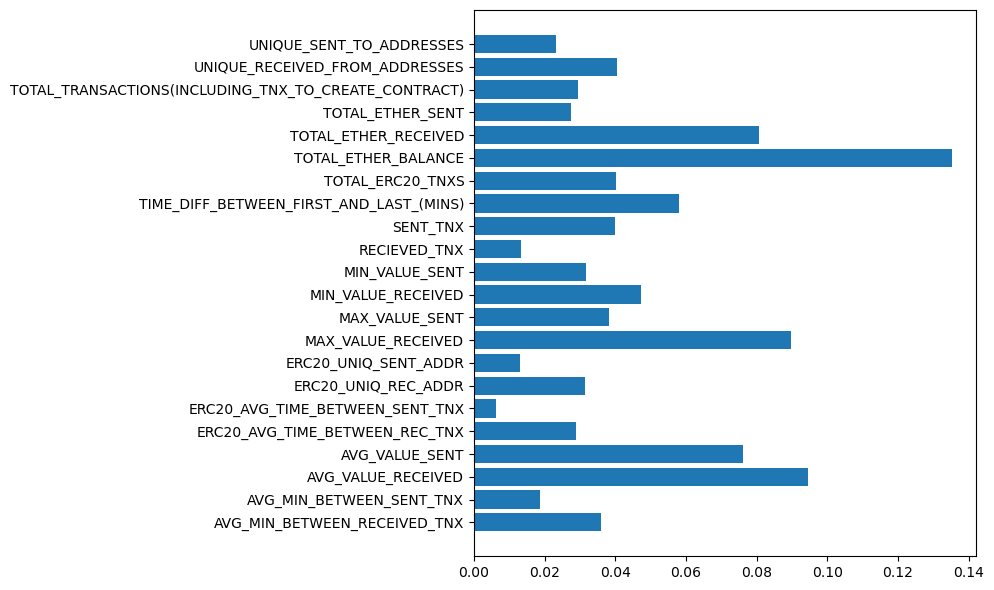

In [92]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6)) 
rfcc.feature_importances_
plt.barh(Xc.columns, rfcc.feature_importances_)
plt.tight_layout()

In [ ]:
#Shaply Values
from shap import TreeExplainer
from shap import summary_plot

explainer = TreeExplainer(rfcc)
shap_values = np.array(explainer.shap_values(Xc_train))


shap_values_ = shap_values.transpose((1,0,2))

np.allclose(
    rfcc.predict_proba(Xc_train),
    shap_values_.sum(2) + explainer.expected_value
)

plt.figure(figsize=(3, 3))
#summary_plot(shap_values[0],X_train,plot_type="bar")

summary_plot(shap_values[0],Xc_train)

In [93]:
from sklearn.metrics import precision_recall_fscore_support,classification_report,confusion_matrix
print(classification_report(yc_test,rfcc_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3352
           1       0.98      0.97      0.97      3412

    accuracy                           0.97      6764
   macro avg       0.97      0.97      0.97      6764
weighted avg       0.97      0.97      0.97      6764



In [94]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

predicted_labels_c = rfcc.predict(Xc_test)
true_labels_c = yc_test
accuracy_rfcc = accuracy_score(true_labels_c, predicted_labels_c)
precision_rfcc = precision_score(true_labels_c, predicted_labels_c)
recall_rfcc = recall_score(true_labels_c, predicted_labels_c)

In [95]:
import pandas as pd

results_list_c=[]
model_name = "Random Forest"
results_dict = {
    'Model': model_name,
    'Accuracy': accuracy_rfcc,
    'Precision': precision_rfcc,
    'Recall': recall_rfcc
}

new_entry_df = pd.DataFrame([results_dict])

existing_rows = results_coinbase_df[results_coinbase_df['Model'] == model_name]

if not existing_rows.empty:
    results_coinbase_df = results_coinbase_df[results_coinbase_df['Model'] != model_name]

results_coinbase_df = pd.concat([results_coinbase_df, new_entry_df], ignore_index=True)
results_coinbase_df

,Model,Accuracy,Precision,Recall
0,Random Forest,0.971023,0.976021,0.966295


## DNN Model

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

dnn_model = models.Sequential()
dnn_model.add(layers.Dense(50, activation='relu', input_shape=(X_train.shape[1],)))
dnn_model.add(layers.Dense(50, activation='relu'))
dnn_model.add(layers.Dense(50, activation='relu'))
dnn_model.add(layers.Dense(1, activation='linear'))
dnn_model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy', 'mean_squared_error'])

In [ ]:
history = dnn_model.fit(X_train, y_train, epochs=200, batch_size=20, validation_data= (X_test, y_test))

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

In [ ]:
test_predictions = dnn_model.predict(X_test)
dnn_model.evaluate(X_test,y_test)

In [ ]:
import numpy as np
pred_classes = np.argmax(dnn_model.predict(X_train),axis=1)
pred_classes

from sklearn.metrics import classification_report,confusion_matrix
cr = classification_report(y_train,pred_classes)
print(cr)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

## Decision Trees

##### Random Sampling

In [96]:
#Model creation
import time
start_time = time.time()

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [97]:
#Prediction & Evaluation
dtree_pred = dtree.predict(X_test)
dtree_pred

array([0, 0, 1, ..., 1, 1, 0])

In [98]:
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Computation time: {elapsed_time:.2f} seconds")

Computation time: 3.52 seconds


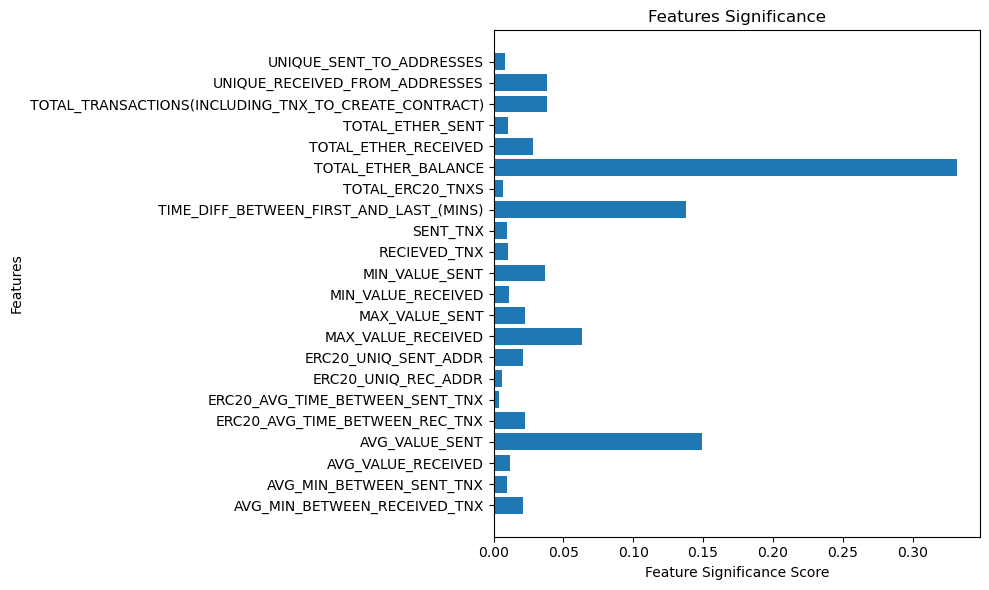

In [99]:
#Feature Importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6)) 
dtree.feature_importances_
plt.barh(X.columns, dtree.feature_importances_)
plt.xlabel('Feature Significance Score')
plt.ylabel('Features')
plt.title('Features Significance')
plt.tight_layout()
plt.show()

In [ ]:
import shap

explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_train)
plt.figure(figsize=(3, 3))
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [100]:
from sklearn.metrics import precision_recall_fscore_support,classification_report,confusion_matrix
print(classification_report(y_test,dtree_pred))
print(confusion_matrix(y_test,dtree_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      4399
           1       0.90      0.89      0.90      3437

    accuracy                           0.91      7836
   macro avg       0.91      0.91      0.91      7836
weighted avg       0.91      0.91      0.91      7836

[[4071  328]
 [ 371 3066]]


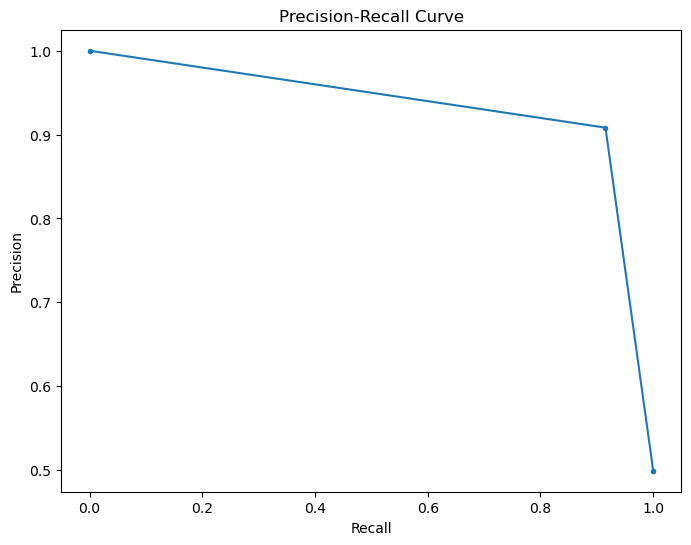

In [68]:
#Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, dtree_pred)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [101]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

predicted_labels = dtree.predict(X_test)
true_labels = y_test
accuracy_dtree = accuracy_score(true_labels, predicted_labels)
precision_dtree = precision_score(true_labels, predicted_labels)
recall_dtree = recall_score(true_labels, predicted_labels)

In [102]:
import pandas as pd

model_name = "Decision Trees"
results_dict = {
    'Model': model_name,
    'Accuracy': accuracy_dtree,
    'Precision': precision_dtree,
    'Recall': recall_dtree
}

new_entry_df = pd.DataFrame([results_dict])

existing_rows = results_random_df[results_random_df['Model'] == model_name]

if not existing_rows.empty:
    results_random_df = results_random_df[results_random_df['Model'] != model_name]

results_random_df = pd.concat([results_random_df, new_entry_df], ignore_index=True)
results_random_df

,Model,Accuracy,Precision,Recall
0,Random Forest,0.941679,0.958462,0.906314
1,Decision Trees,0.910796,0.903359,0.892057


##### Coinbase

In [103]:
#Model creation
import time
start_time = time.time()

from sklearn.tree import DecisionTreeClassifier
dtreec = DecisionTreeClassifier()
dtreec.fit(Xc_train,yc_train)

DecisionTreeClassifier()

In [104]:
#Prediction & Evaluation
dtree_predc = dtreec.predict(Xc_test)
dtree_predc

array([1, 1, 1, ..., 1, 0, 0])

In [105]:
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Computation time: {elapsed_time:.2f} seconds")

Computation time: 2.20 seconds


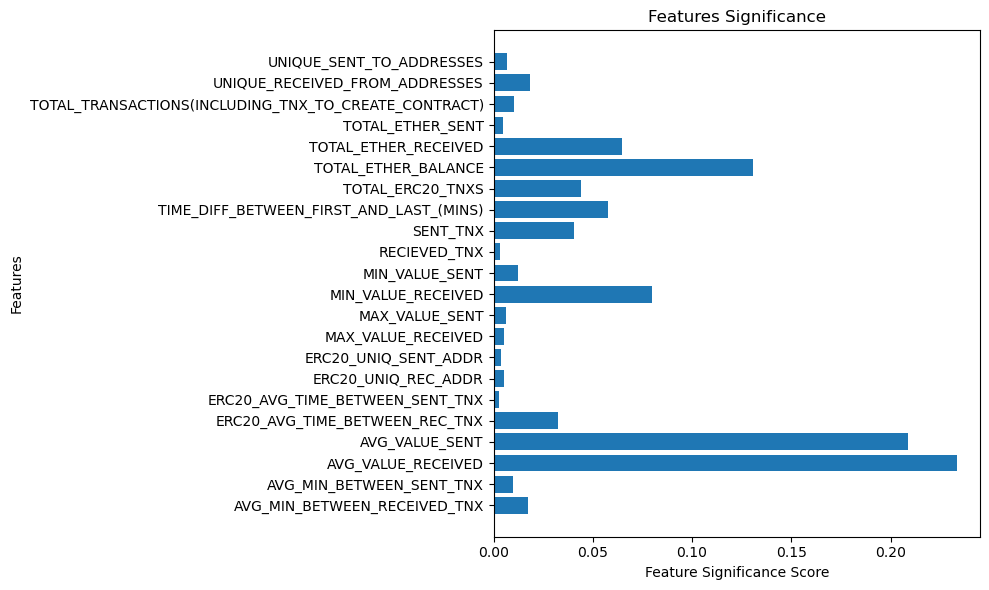

In [106]:
#Feature Importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6)) 
dtreec.feature_importances_
plt.barh(Xc.columns, dtreec.feature_importances_)
plt.xlabel('Feature Significance Score')
plt.ylabel('Features')
plt.title('Features Significance')
plt.tight_layout()
plt.show()

In [ ]:
import shap

explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(Xc_train)
plt.figure(figsize=(3, 3))
shap.summary_plot(shap_values, Xc_train, plot_type="bar")

In [107]:
from sklearn.metrics import precision_recall_fscore_support,classification_report,confusion_matrix
print(classification_report(yc_test,dtree_predc))
print(confusion_matrix(yc_test,dtree_predc))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      3352
           1       0.94      0.96      0.95      3412

    accuracy                           0.95      6764
   macro avg       0.95      0.95      0.95      6764
weighted avg       0.95      0.95      0.95      6764

[[3159  193]
 [ 149 3263]]


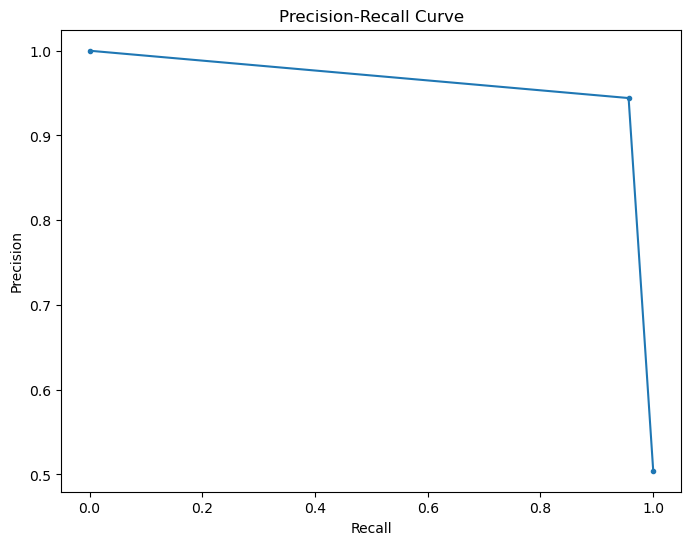

In [108]:
#Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(yc_test, dtree_predc)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [109]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

predictedc_labels = dtreec.predict(Xc_test)
truec_labels = yc_test
accuracyc_dtree = accuracy_score(truec_labels, predictedc_labels)
precisionc_dtree = precision_score(truec_labels, predictedc_labels)
recallc_dtree = recall_score(truec_labels, predictedc_labels)

In [110]:
import pandas as pd

model_name = "Decision Trees"
results_dict = {
    'Model': model_name,
    'Accuracy': accuracyc_dtree,
    'Precision': precisionc_dtree,
    'Recall': recallc_dtree
}

new_entry_df = pd.DataFrame([results_dict])

existing_rows = results_coinbase_df[results_coinbase_df['Model'] == model_name]

if not existing_rows.empty:
    results_coinbase_df = results_coinbase_df[results_coinbase_df['Model'] != model_name]

results_coinbase_df = pd.concat([results_coinbase_df, new_entry_df], ignore_index=True)
results_coinbase_df

,Model,Accuracy,Precision,Recall
0,Random Forest,0.971023,0.976021,0.966295
1,Decision Trees,0.949438,0.944155,0.956331


## Gradient Boost

## XG Boost

## Isolation Forest Model

## Balanced Bagging Classifier

#### Random Sampling

In [111]:
print(data_random.groupby('FLAG').size())

FLAG
0    14740
1    11378
dtype: int64


In [112]:
print(data_coinbase.groupby('FLAG').size())

FLAG
0    11166
1    11378
dtype: int64


In [113]:
#SMOTE for oversampling the data
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='minority', random_state=42)
oversampled_X, oversampled_Y = sm.fit_resample(X, Y)
#Oversampled DataFrame
oversampled = pd.concat([pd.DataFrame(oversampled_Y, columns=['FLAG']), pd.DataFrame(oversampled_X, columns=X.columns)], axis=1)

In [114]:
import time
start_time = time.time()

#Balanced Bagging Classifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_resampled, Y_resampled = sm.fit_resample(oversampled_X, oversampled_Y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, Y_resampled, test_size=0.3, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'base_estimator__max_depth': [None, 10, 20, 50],
    'n_estimators': [0, 150, 200],
    'max_samples': [0.5, 0.7, 0.9],
    'max_features': [0.5, 0.7, 0.9]
}

base_classifier = DecisionTreeClassifier(random_state=1)
classifier_c = BalancedBaggingClassifier(base_estimator=base_classifier, 
                                       sampling_strategy='not majority',
                                       n_estimators = 500,
                                       replacement=False,
                                       random_state=42)

grid_search_bb = GridSearchCV(estimator=classifier_c, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search_bb.fit(X_train, y_train)
top_bb_params = grid_search_bb.best_params_
print("Top features as hyperparameters:", top_bb_params)
top_bb_model = BalancedBaggingClassifier(**top_bb_params, random_state=42)
top_bb_model.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END base_estimator__max_depth=None, max_features=0.5, max_samples=0.5, n_estimators=0; total time=   0.0s
[CV] END base_estimator__max_depth=None, max_features=0.5, max_samples=0.5, n_estimators=0; total time=   0.0s
[CV] END base_estimator__max_depth=None, max_features=0.5, max_samples=0.5, n_estimators=0; total time=   0.0s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.5, max_samples=0.5, n_estimators=150; total time=  10.2s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.5, max_samples=0.5, n_estimators=150; total time=  10.1s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.5, max_samples=0.5, n_estimators=150; total time=  10.2s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.5, max_samples=0.5, n_estimators=200; total time=  13.7s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.5, max_samples=0.5, n_estimators=200; total time=  13.1s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.5, max_samples=0.5, n_estimators=200; total time=  13.2s
[CV] END base_estimator__max_depth=None, max_features=0.5, max_samples=0.7, n_estimators=0; total time=   0.0s
[CV] END base_estimator__max_depth=None, max_features=0.5, max_samples=0.7, n_estimators=0; total time=   0.0s
[CV] END base_estimator__max_depth=None, max_features=0.5, max_samples=0.7, n_estimators=0; total time=   0.0s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.5, max_samples=0.7, n_estimators=150; total time=  14.3s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.5, max_samples=0.7, n_estimators=150; total time=  13.9s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.5, max_samples=0.7, n_estimators=150; total time=  14.1s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.5, max_samples=0.7, n_estimators=200; total time=  19.4s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.5, max_samples=0.7, n_estimators=200; total time=  19.0s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.5, max_samples=0.7, n_estimators=200; total time=  18.8s
[CV] END base_estimator__max_depth=None, max_features=0.5, max_samples=0.9, n_estimators=0; total time=   0.0s
[CV] END base_estimator__max_depth=None, max_features=0.5, max_samples=0.9, n_estimators=0; total time=   0.0s
[CV] END base_estimator__max_depth=None, max_features=0.5, max_samples=0.9, n_estimators=0; total time=   0.0s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.5, max_samples=0.9, n_estimators=150; total time=  18.2s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.5, max_samples=0.9, n_estimators=150; total time=  17.5s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.5, max_samples=0.9, n_estimators=150; total time=  18.3s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.5, max_samples=0.9, n_estimators=200; total time=  23.7s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.5, max_samples=0.9, n_estimators=200; total time=  23.5s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.5, max_samples=0.9, n_estimators=200; total time=  24.6s
[CV] END base_estimator__max_depth=None, max_features=0.7, max_samples=0.5, n_estimators=0; total time=   0.0s
[CV] END base_estimator__max_depth=None, max_features=0.7, max_samples=0.5, n_estimators=0; total time=   0.0s
[CV] END base_estimator__max_depth=None, max_features=0.7, max_samples=0.5, n_estimators=0; total time=   0.0s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.7, max_samples=0.5, n_estimators=150; total time=  15.0s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.7, max_samples=0.5, n_estimators=150; total time=  15.0s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.7, max_samples=0.5, n_estimators=150; total time=  14.9s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.7, max_samples=0.5, n_estimators=200; total time=  19.7s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.7, max_samples=0.5, n_estimators=200; total time=  19.4s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.7, max_samples=0.5, n_estimators=200; total time=  20.4s
[CV] END base_estimator__max_depth=None, max_features=0.7, max_samples=0.7, n_estimators=0; total time=   0.0s
[CV] END base_estimator__max_depth=None, max_features=0.7, max_samples=0.7, n_estimators=0; total time=   0.0s
[CV] END base_estimator__max_depth=None, max_features=0.7, max_samples=0.7, n_estimators=0; total time=   0.0s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.7, max_samples=0.7, n_estimators=150; total time=  21.4s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.7, max_samples=0.7, n_estimators=150; total time=  21.0s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.7, max_samples=0.7, n_estimators=150; total time=  20.5s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.7, max_samples=0.7, n_estimators=200; total time=  26.3s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.7, max_samples=0.7, n_estimators=200; total time=  27.6s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.7, max_samples=0.7, n_estimators=200; total time=  28.8s
[CV] END base_estimator__max_depth=None, max_features=0.7, max_samples=0.9, n_estimators=0; total time=   0.0s
[CV] END base_estimator__max_depth=None, max_features=0.7, max_samples=0.9, n_estimators=0; total time=   0.0s
[CV] END base_estimator__max_depth=None, max_features=0.7, max_samples=0.9, n_estimators=0; total time=   0.0s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.7, max_samples=0.9, n_estimators=150; total time=  26.1s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.7, max_samples=0.9, n_estimators=150; total time=  26.7s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.7, max_samples=0.9, n_estimators=150; total time=  26.8s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.7, max_samples=0.9, n_estimators=200; total time=  35.9s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.7, max_samples=0.9, n_estimators=200; total time=  32.3s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.7, max_samples=0.9, n_estimators=200; total time=  32.2s
[CV] END base_estimator__max_depth=None, max_features=0.9, max_samples=0.5, n_estimators=0; total time=   0.0s
[CV] END base_estimator__max_depth=None, max_features=0.9, max_samples=0.5, n_estimators=0; total time=   0.0s
[CV] END base_estimator__max_depth=None, max_features=0.9, max_samples=0.5, n_estimators=0; total time=   0.0s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.9, max_samples=0.5, n_estimators=150; total time=  17.2s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.9, max_samples=0.5, n_estimators=150; total time=  18.1s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.9, max_samples=0.5, n_estimators=150; total time=  16.9s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.9, max_samples=0.5, n_estimators=200; total time=  23.2s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.9, max_samples=0.5, n_estimators=200; total time=  22.4s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.9, max_samples=0.5, n_estimators=200; total time=  22.6s
[CV] END base_estimator__max_depth=None, max_features=0.9, max_samples=0.7, n_estimators=0; total time=   0.0s
[CV] END base_estimator__max_depth=None, max_features=0.9, max_samples=0.7, n_estimators=0; total time=   0.0s
[CV] END base_estimator__max_depth=None, max_features=0.9, max_samples=0.7, n_estimators=0; total time=   0.0s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.9, max_samples=0.7, n_estimators=150; total time=  25.1s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.9, max_samples=0.7, n_estimators=150; total time=  23.5s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.9, max_samples=0.7, n_estimators=150; total time=  23.8s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.9, max_samples=0.7, n_estimators=200; total time=  32.1s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.9, max_samples=0.7, n_estimators=200; total time=  31.1s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.9, max_samples=0.7, n_estimators=200; total time=  31.6s
[CV] END base_estimator__max_depth=None, max_features=0.9, max_samples=0.9, n_estimators=0; total time=   0.0s
[CV] END base_estimator__max_depth=None, max_features=0.9, max_samples=0.9, n_estimators=0; total time=   0.0s
[CV] END base_estimator__max_depth=None, max_features=0.9, max_samples=0.9, n_estimators=0; total time=   0.0s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.9, max_samples=0.9, n_estimators=150; total time=  31.0s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.9, max_samples=0.9, n_estimators=150; total time=  30.0s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.9, max_samples=0.9, n_estimators=150; total time=  30.4s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.9, max_samples=0.9, n_estimators=200; total time=  40.8s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.9, max_samples=0.9, n_estimators=200; total time=  40.3s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=None, max_features=0.9, max_samples=0.9, n_estimators=200; total time=  40.7s
[CV] END base_estimator__max_depth=10, max_features=0.5, max_samples=0.5, n_estimators=0; total time=   0.0s
[CV] END base_estimator__max_depth=10, max_features=0.5, max_samples=0.5, n_estimators=0; total time=   0.0s
[CV] END base_estimator__max_depth=10, max_features=0.5, max_samples=0.5, n_estimators=0; total time=   0.0s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=10, max_features=0.5, max_samples=0.5, n_estimators=150; total time=   8.7s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=10, max_features=0.5, max_samples=0.5, n_estimators=150; total time=   8.8s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=10, max_features=0.5, max_samples=0.5, n_estimators=150; total time=   8.6s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=10, max_features=0.5, max_samples=0.5, n_estimators=200; total time=  11.8s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=10, max_features=0.5, max_samples=0.5, n_estimators=200; total time=  11.7s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=10, max_features=0.5, max_samples=0.5, n_estimators=200; total time=  11.9s
[CV] END base_estimator__max_depth=10, max_features=0.5, max_samples=0.7, n_estimators=0; total time=   0.0s
[CV] END base_estimator__max_depth=10, max_features=0.5, max_samples=0.7, n_estimators=0; total time=   0.0s
[CV] END base_estimator__max_depth=10, max_features=0.5, max_samples=0.7, n_estimators=0; total time=   0.0s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=10, max_features=0.5, max_samples=0.7, n_estimators=150; total time=  12.3s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=10, max_features=0.5, max_samples=0.7, n_estimators=150; total time=  11.5s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=10, max_features=0.5, max_samples=0.7, n_estimators=150; total time=  11.7s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=10, max_features=0.5, max_samples=0.7, n_estimators=200; total time=  16.3s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=10, max_features=0.5, max_samples=0.7, n_estimators=200; total time=  15.7s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=10, max_features=0.5, max_samples=0.7, n_estimators=200; total time=  15.8s
[CV] END base_estimator__max_depth=10, max_features=0.5, max_samples=0.9, n_estimators=0; total time=   0.0s
[CV] END base_estimator__max_depth=10, max_features=0.5, max_samples=0.9, n_estimators=0; total time=   0.0s
[CV] END base_estimator__max_depth=10, max_features=0.5, max_samples=0.9, n_estimators=0; total time=   0.0s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=10, max_features=0.5, max_samples=0.9, n_estimators=150; total time=  15.1s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=10, max_features=0.5, max_samples=0.9, n_estimators=150; total time=  14.6s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=10, max_features=0.5, max_samples=0.9, n_estimators=150; total time=  14.8s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=10, max_features=0.5, max_samples=0.9, n_estimators=200; total time=  20.4s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=10, max_features=0.5, max_samples=0.9, n_estimators=200; total time=  19.5s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=10, max_features=0.5, max_samples=0.9, n_estimators=200; total time=  19.8s
[CV] END base_estimator__max_depth=10, max_features=0.7, max_samples=0.5, n_estimators=0; total time=   0.0s
[CV] END base_estimator__max_depth=10, max_features=0.7, max_samples=0.5, n_estimators=0; total time=   0.0s
[CV] END base_estimator__max_depth=10, max_features=0.7, max_samples=0.5, n_estimators=0; total time=   0.0s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=10, max_features=0.7, max_samples=0.5, n_estimators=150; total time=  11.4s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=10, max_features=0.7, max_samples=0.5, n_estimators=150; total time=  11.4s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=10, max_features=0.7, max_samples=0.5, n_estimators=150; total time=  11.5s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=10, max_features=0.7, max_samples=0.5, n_estimators=200; total time=  15.3s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=10, max_features=0.7, max_samples=0.5, n_estimators=200; total time=  15.3s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=10, max_features=0.7, max_samples=0.5, n_estimators=200; total time=  15.6s
[CV] END base_estimator__max_depth=10, max_features=0.7, max_samples=0.7, n_estimators=0; total time=   0.0s
[CV] END base_estimator__max_depth=10, max_features=0.7, max_samples=0.7, n_estimators=0; total time=   0.0s
[CV] END base_estimator__max_depth=10, max_features=0.7, max_samples=0.7, n_estimators=0; total time=   0.0s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=10, max_features=0.7, max_samples=0.7, n_estimators=150; total time=  15.7s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=10, max_features=0.7, max_samples=0.7, n_estimators=150; total time=  15.8s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=10, max_features=0.7, max_samples=0.7, n_estimators=150; total time=  15.6s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=10, max_features=0.7, max_samples=0.7, n_estimators=200; total time=  20.5s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=10, max_features=0.7, max_samples=0.7, n_estimators=200; total time=  20.6s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=10, max_features=0.7, max_samples=0.7, n_estimators=200; total time=  20.7s
[CV] END base_estimator__max_depth=10, max_features=0.7, max_samples=0.9, n_estimators=0; total time=   0.0s
[CV] END base_estimator__max_depth=10, max_features=0.7, max_samples=0.9, n_estimators=0; total time=   0.0s
[CV] END base_estimator__max_depth=10, max_features=0.7, max_samples=0.9, n_estimators=0; total time=   0.0s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=10, max_features=0.7, max_samples=0.9, n_estimators=150; total time=  20.4s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=10, max_features=0.7, max_samples=0.9, n_estimators=150; total time=  19.7s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=10, max_features=0.7, max_samples=0.9, n_estimators=150; total time=  19.5s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=10, max_features=0.7, max_samples=0.9, n_estimators=200; total time=  25.6s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=10, max_features=0.7, max_samples=0.9, n_estimators=200; total time=  25.7s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=10, max_features=0.7, max_samples=0.9, n_estimators=200; total time=  26.4s
[CV] END base_estimator__max_depth=10, max_features=0.9, max_samples=0.5, n_estimators=0; total time=   0.0s
[CV] END base_estimator__max_depth=10, max_features=0.9, max_samples=0.5, n_estimators=0; total time=   0.0s
[CV] END base_estimator__max_depth=10, max_features=0.9, max_samples=0.5, n_estimators=0; total time=   0.0s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=10, max_features=0.9, max_samples=0.5, n_estimators=150; total time=  14.4s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=10, max_features=0.9, max_samples=0.5, n_estimators=150; total time=  14.2s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=10, max_features=0.9, max_samples=0.5, n_estimators=150; total time=  14.2s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=10, max_features=0.9, max_samples=0.5, n_estimators=200; total time=  19.0s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=10, max_features=0.9, max_samples=0.5, n_estimators=200; total time=  19.6s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=10, max_features=0.9, max_samples=0.5, n_estimators=200; total time=  18.8s
[CV] END base_estimator__max_depth=10, max_features=0.9, max_samples=0.7, n_estimators=0; total time=   0.0s
[CV] END base_estimator__max_depth=10, max_features=0.9, max_samples=0.7, n_estimators=0; total time=   0.0s
[CV] END base_estimator__max_depth=10, max_features=0.9, max_samples=0.7, n_estimators=0; total time=   0.0s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=10, max_features=0.9, max_samples=0.7, n_estimators=150; total time=  19.4s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


[CV] END base_estimator__max_depth=10, max_features=0.9, max_samples=0.7, n_estimators=150; total time=  19.7s


/opt/conda/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


In [ ]:
#Predicting on the test data
preds = classifier.predict(X_test)
train_preds = classifier.predict(X_train)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Computation time: {elapsed_time:.2f} seconds")

In [ ]:
#metrics
train_accuracy = accuracy_score(y_train, train_preds)
train_precision = precision_score(y_train, train_preds)
train_recall = recall_score(y_train, train_preds)
accuracy_bb = accuracy_score(y_test, preds)
precision_bb = precision_score(y_test, preds)
recall_bb = recall_score(y_test, preds)
f1_bb = f1_score(y_test, preds)

print("Train accuracy:",train_accuracy)
print("Test accuracy:",accuracy_bb)
print("Train precision:",train_precision)
print("Test precision:",precision_bb)
print("Train recall:",train_recall)
print("Test recall:",recall_bb)

In [ ]:
import pandas as pd

model_name = "Balanced Bagging Classifier"
results_dict = {
    'Model': model_name,
    'Accuracy': accuracy_bb,
    'Precision': precision_bb,
    'Recall': recall_bb
}

new_entry_df = pd.DataFrame([results_dict])

existing_rows = results_random_df[results_random_df['Model'] == model_name]

if not existing_rows.empty:
    results_random_df = results_random_df[results_random_df['Model'] != model_name]

results_random_df = pd.concat([results_random_df, new_entry_df], ignore_index=True)
results_random_df

#### Coinbase

In [ ]:
#SMOTE for oversampling the data
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='minority', random_state=42)
oversampled_X, oversampled_Y = sm.fit_resample(Xc, Yc)
oversampled = pd.concat([pd.DataFrame(oversampled_Y, columns=['FLAG']), pd.DataFrame(oversampled_X, columns=Xc.columns)], axis=1)

In [ ]:
import time
start_time = time.time()

from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_resampled, Y_resampled = sm.fit_resample(oversampled_X, oversampled_Y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, Y_resampled, test_size=0.3, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'base_estimator__max_depth': [None, 10, 20, 50],
    'n_estimators': [0, 150, 200],
    'max_samples': [0.5, 0.7, 0.9],
    'max_features': [0.5, 0.7, 0.9]
}

base_classifier = DecisionTreeClassifier(random_state=1)
classifier_c = BalancedBaggingClassifier(base_estimator=base_classifier, 
                                       sampling_strategy='not majority',
                                       n_estimators = 500,
                                       replacement=False,
                                       random_state=42)

grid_search_bb = GridSearchCV(estimator=classifier_c, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search_bb.fit(X_train, y_train)
top_bb_params = grid_search_bb.best_params_
print("Top features as hyperparameters:", top_bb_params)
top_bb_model = BalancedBaggingClassifier(**top_bb_params, random_state=42)
top_bb_model.fit(X_train, y_train)

In [ ]:
#Predicting on the test data
preds = top_bb_model.predict(X_test)
train_preds = top_bb_model.predict(X_train)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Computation time: {elapsed_time:.2f} seconds")

In [ ]:
#metrics
train_accuracyc = accuracy_score(y_train, train_preds)
train_precisionc = precision_score(y_train, train_preds)
train_recallc = recall_score(y_train, train_preds)
accuracy_bbc = accuracy_score(y_test, preds)
precision_bbc = precision_score(y_test, preds)
recall_bbc = recall_score(y_test, preds)
f1_bbc = f1_score(y_test, preds)

print("Train accuracy:",train_accuracyc)
print("Test accuracy:",accuracy_bbc)
print("Train precision:",train_precisionc)
print("Test precision:",precision_bbc)
print("Train recall:",train_recallc)
print("Test recall:",recall_bbc)

In [ ]:
import pandas as pd

model_name = "Balanced Bagging Classifier"
results_dict = {
    'Model': model_name,
    'Accuracy': accuracy_bbc,
    'Precision': precision_bbc,
    'Recall': recall_bbc
}

new_entry_df = pd.DataFrame([results_dict])

existing_rows = results_coinbase_df[results_coinbase_df['Model'] == model_name]

if not existing_rows.empty:
    results_coinbase_df = results_coinbase_df[results_coinbase_df['Model'] != model_name]

results_coinbase_df = pd.concat([results_coinbase_df, new_entry_df], ignore_index=True)
results_coinbase_df

## Ensemble Model

#### Random

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import VotingClassifier

# Create a Voting Classifier that combines all models
ensemble_model = VotingClassifier(estimators=[
    ('Random Forest', rfc),
    ('Decision Tree', dtree),
    ('Balanced Bagging Classifier', top_bb_model)
], voting='soft')  # Use 'soft' for weighted voting

# Create lists to store model names, accuracies, precisions, and recalls
model_names = ['Random Forest', 'Decision Tree', 'Balanced Bagging Classifier', 'Ensemble']
accuracies = []
precisions = []
recalls = []

# Evaluate and compare the performance of each model
models = [rfc, dtree, top_bb_model, ensemble_model]

for model, model_name in zip(models, model_names):
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate accuracy, precision, and recall
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls
})

# Sort the DataFrame by accuracy (descending)
metrics_df = metrics_df.sort_values(by='Accuracy', ascending=False)

# Print the metrics comparison table
print(metrics_df)